In [264]:
!ls
pd.set_option('display.max_columns', None)

05_Airbnb_Statics_EDA.ipynb   data_n.csv
X_air.csv                     lan_con.csv
age_gender_bkts.csv           new_session.csv
age_gender_bkts.csv.zip       preprocess1.csv
air.py                        preprocessed_data.csv
airbnb.py                     sample_submission_NDF.csv
airbnb_data.csv               sample_submission_NDF.csv.zip
airbnb_deeplearning.ipynb     sessions.csv
airbnb_eda.ipynb              sessions.csv.zip
airbnb_eda2.ipynb             test_users.csv
airbnb_home.ipynb             test_users.csv.zip
airbnb_model.ipynb            train_users_2.csv
countries.csv                 train_users_2.csv.zip
countries.csv.zip             y)air.csv
data3.csv


In [6]:
data = pd.read_csv('./data3.csv')
data.tail()

,user_id,date_first_booking,age,signup_flow,country_destination,gender_FEMALE,gender_MALE,gender_OTHER,first_browser_-unknown-,first_browser_AOL Explorer,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
73401,zxodksqpep,yes,32.0,0,NDF,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73402,mhewnxesx9,yes,34.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73403,6o3arsjbb4,yes,32.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73404,jh95kwisub,yes,34.0,25,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73405,nw9fwlyb5f,yes,34.0,25,NDF,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data['country_destination'].unique()

array(['other', 'NDF', 'GB', 'US', 'FR', 'IT', 'CA', 'AU', 'DE', 'ES',
       'NL', 'PT'], dtype=object)

In [11]:
data['country_destination'].value_counts()

NDF      44793
US       19978
other     3630
FR        1425
IT         976
GB         728
ES         707
CA         439
DE         249
NL         247
AU         151
PT          83
Name: country_destination, dtype: int64

## 첫여행을 어디로 갈지 예측하기 (baseline 잡기)

In [13]:
data = pd.read_csv('./lan_con.csv')

In [14]:
# baseline 1
len(data[data3['date_account_created'] == 'yes'])/len(data3)

0.3054986858810687

In [15]:
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,yes,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,yes,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [19]:
!ls

05_Airbnb_Statics_EDA.ipynb   data3.csv
X_air.csv                     data_n.csv
age_gender_bkts.csv           lan_con.csv
age_gender_bkts.csv.zip       new_session.csv
air.py                        preprocess1.csv
airbnb.py                     sample_submission_NDF.csv
airbnb_data.csv               sample_submission_NDF.csv.zip
airbnb_deeplearning.ipynb     sessions.csv
airbnb_eda.ipynb              sessions.csv.zip
airbnb_eda2.ipynb             test_users.csv
airbnb_home.ipynb             test_users.csv.zip
airbnb_model.ipynb            train_users_2.csv
countries.csv                 train_users_2.csv.zip
countries.csv.zip             y)air.csv


In [20]:
data3 = pd.read_csv('./data3.csv')

In [77]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
lab = LabelEncoder()
mm = MinMaxScaler()

In [38]:
lab.fit(data3['country_destination'])

LabelEncoder()

In [39]:
lab.classes_

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US',
       'other'], dtype=object)

In [23]:
X = mm.fit_transform(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1))
y = data3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7046589773862502


In [29]:
proba = lgbm.predict_proba(X_test)

In [53]:
lab.inverse_transform(lgbm.predict(X_test[[0]]))

array(['NDF'], dtype=object)

In [50]:
proba[0].round(4)

array([0.000e+00, 1.600e-03, 1.000e-04, 2.600e-03, 4.200e-03, 3.700e-03,
       6.400e-03, 8.996e-01, 7.000e-04, 0.000e+00, 6.730e-02, 1.390e-02])

In [51]:
dict(zip(lab.classes_, proba[0].round(4)))

{'AU': 0.0,
 'CA': 0.0016,
 'DE': 0.0001,
 'ES': 0.0026,
 'FR': 0.0042,
 'GB': 0.0037,
 'IT': 0.0064,
 'NDF': 0.8996,
 'NL': 0.0007,
 'PT': 0.0,
 'US': 0.0673,
 'other': 0.0139}

In [58]:
fea = dict(zip(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1).columns, lgbm.feature_importances_))
sorted(fea.items(), key=lambda item: item[1], reverse=True)

[('action_header_userpic', 1597),
 ('age', 1543),
 ('action_show', 1243),
 ('action_personalize', 1137),
 ('action_index', 1105),
 ('action_confirm_email', 998),
 ('action_ajax_refresh_subtotal', 891),
 ('action_similar_listings', 864),
 ('action_update', 821),
 ('action_dashboard', 759),
 ('action_search_results', 715),
 ('action_create', 678),
 ('action_lookup', 640),
 ('action_ask_question', 596),
 ('action_requested', 555),
 ('action_pending', 483),
 ('action_travel_plans_current', 458),
 ('action_other_hosting_reviews_first', 446),
 ('action_verify', 443),
 ('action_active', 401),
 ('action_show_personalize', 398),
 ('action_cancellation_policies', 370),
 ('action_authenticate', 366),
 ('action_ajax_check_dates', 357),
 ('action_ajax_lwlb_contact', 354),
 ('action_edit', 340),
 ('action_qt2', 330),
 ('action_open_graph_setting', 309),
 ('action_campaigns', 285),
 ('action_calendar_tab_inner2', 277),
 ('action_notifications', 277),
 ('action_signup_login', 277),
 ('action_identity'

In [57]:
# baseline 2
len(data3[(data3['country_destination'] == 'NDF') | (data3['country_destination'] == 'other')])/len(data3)

0.6596599732991854

In [86]:
# baseline 3
len(data3[data3['country_destination'] == 'NDF'])/len(data3)

0.610208974743209

In [76]:
# feature importance의 평균
sum(fea.values())/len(fea.values())

71.71314741035856

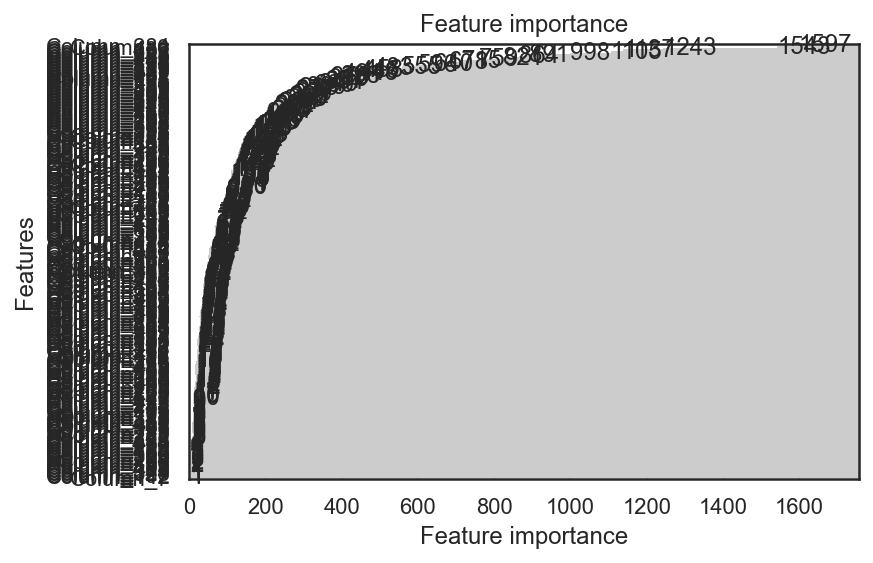

In [85]:
#plt, ax = plt.subplots()
plot_importance(lgbm)

In [91]:
fea_list = []

for v,i in fea.items():
    fea_list.append(i)

In [99]:
# feature들의 통계 값
pd.DataFrame([fea]).T.describe()

,0
count,502.000000
mean,71.713147
std,181.749563
min,0.000000
25%,0.000000
50%,6.000000
75%,63.750000
max,1597.000000


In [102]:
df_fea = pd.DataFrame([fea]).T

In [107]:
# feature importance가 0인 값들의 갯수
len(df_fea[df_fea[0] == 0].index)

218

In [108]:
# 총 컬럼
len(data3.columns)

506

In [109]:
#feature importance가 0인 컬럼들
df_fea[df_fea[0] == 0].index

Index(['first_browser_AOL Explorer', 'first_browser_Apple Mail',
       'first_browser_Arora', 'first_browser_Avant Browser',
       'first_browser_BlackBerry Browser', 'first_browser_Camino',
       'first_browser_Chromium', 'first_browser_CometBird',
       'first_browser_Comodo Dragon', 'first_browser_Conkeror',
       ...
       'action_update_reservation_requirements', 'action_use_mobile_site',
       'action_view', 'action_views', 'action_views_campaign',
       'action_views_campaign_rules', 'action_weibo_signup_referral_finish',
       'action_widget', 'action_wishlists', 'action_zendesk_login_jwt'],
      dtype='object', length=218)

In [110]:
data3

,user_id,date_first_booking,age,signup_flow,country_destination,gender_FEMALE,gender_MALE,gender_OTHER,first_browser_-unknown-,first_browser_AOL Explorer,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,d1mm9tcy42,yes,62.0,0,other,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,yo8nz8bqcq,yes,34.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4grx6yxeby,yes,34.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ncf87guaf0,yes,34.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4rvqpxoh3h,yes,34.0,25,GB,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73401,zxodksqpep,yes,32.0,0,NDF,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73402,mhewnxesx9,yes,34.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73403,6o3arsjbb4,yes,32.0,0,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73404,jh95kwisub,yes,34.0,25,NDF,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# feature importance가 0이 아닌 컬럼들
len(data3.drop(df_fea[df_fea[0] == 0].index,1).columns)

288

In [114]:
data4 = data3.drop(df_fea[df_fea[0] == 0].index,1)

In [115]:
# 218개의 안중요한 컬럼들을 덜어내도 정확도는 똑같다
X = mm.fit_transform(data4.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1))
y = data4['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7046589773862502


In [119]:
# 첫여행지 예측
fea = dict(zip(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1).columns, lgbm.feature_importances_))
sorted(fea.items(), key=lambda item: item[1], reverse=True)

[('action_acculynk_pin_pad_success', 1597),
 ('age', 1543),
 ('action_decision_tree', 1243),
 ('action_become_user', 1137),
 ('action_add_note', 1105),
 ('language_pt', 998),
 ('first_device_type_iPhone', 891),
 ('action_detect_fb_session', 864),
 ('action_friends_new', 821),
 ('date_account_created_5', 759),
 ('action_dashboard', 715),
 ('date_account_created_2', 678),
 ('action_ajax_payout_edit', 640),
 ('first_affiliate_tracked_untracked', 596),
 ('action_create', 555),
 ('action_available', 483),
 ('action_forgot_password', 458),
 ('action_apply_coupon_click', 446),
 ('action_handle_vanity_url', 443),
 ('affiliate_provider_meetup', 401),
 ('action_delete', 398),
 ('language_fr', 370),
 ('language_cs', 366),
 ('affiliate_provider_yahoo', 357),
 ('first_device_type_Android Tablet', 354),
 ('date_account_created_11', 340),
 ('action_clear_reservation', 330),
 ('action_apply', 309),
 ('language_es', 285),
 ('language_el', 277),
 ('action_ajax_statsd', 277),
 ('action_desks', 277),
 ('a

In [135]:
df_fea = pd.DataFrame([fea]).T

In [146]:
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
cf.go_offline(connected=True)

In [157]:
df_fea2 = df_fea.sort_values(by=0, ascending=False)[:30]

In [158]:
df_fea2

,0
action_acculynk_pin_pad_success,1597
age,1543
action_decision_tree,1243
action_become_user,1137
action_add_note,1105
language_pt,998
first_device_type_iPhone,891
action_detect_fb_session,864
action_friends_new,821
date_account_created_5,759


In [169]:
# 어디로 갈지 분류시 중요한 컬럼 30
layout = go.Layout(title=dict(text='중요도 분포', font=dict(size=20), x=0.5, y=0.95), width=500, height=1000, yaxis=dict(tickvals=tuple(df_fea2.index)), xaxis=dict(tickformat=",d"))
df_fea2.sort_values(by=0).iplot(kind='barh', layout=layout)

## 여행갈사람 분류하기

In [ ]:
# 모델의 정확도를 위해서
# age null값에 median 34 대입

In [170]:
!ls

05_Airbnb_Statics_EDA.ipynb   data3.csv
X_air.csv                     data_n.csv
age_gender_bkts.csv           lan_con.csv
age_gender_bkts.csv.zip       new_session.csv
air.py                        preprocess1.csv
airbnb.py                     sample_submission_NDF.csv
airbnb_data.csv               sample_submission_NDF.csv.zip
airbnb_deeplearning.ipynb     sessions.csv
airbnb_eda.ipynb              sessions.csv.zip
airbnb_eda2.ipynb             test_users.csv
airbnb_home.ipynb             test_users.csv.zip
airbnb_model.ipynb            train_users_2.csv
countries.csv                 train_users_2.csv.zip
countries.csv.zip             y)air.csv


In [310]:
sess = pd.read_csv('./new_session.csv')

In [311]:
prep = pd.read_csv('./preprocessed_data.csv')

In [313]:
tour = prep.merge(sess, left_on='id', right_on='user_id')

In [314]:
tour[['date_first_booking']] = tour[['date_first_booking']].fillna('no')

In [315]:
# 첫 부킹이 없는 유저
print('no booking : ', len(tour[tour['date_first_booking'] == 'no']))
print('no booking : ', len(tour[tour['date_first_booking'] == 'no'])/len(tour))

no booking :  44469
no booking :  0.612006440869242


In [316]:
# 첫 부킹이 있는 유저
print('booked : ', len(tour[tour['date_first_booking'] != 'no']))
print('booked : ', len(tour[tour['date_first_booking'] != 'no'])/len(tour))

booked :  28192
booked :  0.3879935591307579


In [317]:
tour['date_first_booking'][tour['date_first_booking'] != 'no'] = 'yes'

In [318]:
label_booking = LabelEncoder()

In [319]:
label_booking.fit(tour['date_first_booking'])

LabelEncoder()

In [320]:
tour['booking'] = label_booking.transform(tour['date_first_booking'])

In [321]:
tour

,id,timestamp_first_active,date_first_booking,age,signup_flow,country_destination,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,signup_method_basic,signup_method_facebook,signup_method_google,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,date_account_created_01,date_account_created_02,date_account_created_03,date_account_created_04,date_account_created_05,date_account_created_06,date_account_created_07,date_account_created_08,date_account_created_09,date_account_created_10,date_account_created_11,date_account_created_12,first_browser_Chrome,first_browser_Firefox,first_browser_IE,first_browser_Mobile Safari,first_browser_OTHER,first_browser_Safari,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,gender_FEMALE,gender_MALE,gender_OTHER,user_id,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,action_acculynk_load_pin_pad,action_acculynk_pin_pad_error,action_acculynk_pin_pad_inactive,action_acculynk_pin_pad_success,action_acculynk_session_obtained,action_active,action_add_business_address_colorbox,action_add_guest_colorbox,action_add_guests,action_add_note,action_agree_terms_check,action_agree_terms_uncheck,action_airbnb_picks,action_airbrb,action_ajax_check_dates,action_ajax_get_referrals_amt,action_ajax_get_results,action_ajax_google_translate,action_ajax_google_translate_description,action_ajax_google_translate_reviews,action_ajax_image_upload,action_ajax_ldp,action_ajax_lwlb_contact,action_ajax_payout_edit,action_ajax_payout_options_by_country,action_ajax_payout_split_edit,action_ajax_photo_widget,action_ajax_photo_widget_form_iframe,action_ajax_price_and_availability,action_ajax_referral_banner_experiment_type,action_ajax_referral_banner_type,action_ajax_refresh_subtotal,action_ajax_send_message,action_ajax_special_offer_dates_available,action_ajax_statsd,action_ajax_worth,action_apply,action_apply_code,action_apply_coupon_click,action_apply_coupon_click_success,action_apply_coupon_error,action_apply_coupon_error_type,action_apply_reservation,action_approve,action_ask_question,action_at_checkpoint,action_authenticate,action_authorize,action_available,action_badge,action_become_user,action_book,action_booking,action_braintree_client_token,action_business_travel,action_calendar_tab_inner2,action_callback,action_campaigns,action_cancel,action_cancellation_policies,action_cancellation_policy_click,action_change,action_change_availability,action_change_currency,action_change_default_payout,action_change_password,action_ch

In [323]:
X = mm.fit_transform(tour.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.776962245974586


In [324]:
fea2 = dict(zip(tour.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea2.items(), key=lambda item: item[1], reverse=True)

[('age', 187),
 ('action_header_userpic', 82),
 ('action_ajax_refresh_subtotal', 76),
 ('action_manage_listing', 70),
 ('action_ask_question', 68),
 ('action_index', 68),
 ('action_update', 67),
 ('action_personalize', 65),
 ('action_create', 64),
 ('action_confirm_email', 60),
 ('action_pending', 59),
 ('action_show', 58),
 ('action_requested', 55),
 ('action_cancellation_policies', 49),
 ('action_at_checkpoint', 43),
 ('action_other_hosting_reviews_first', 42),
 ('action_verify', 40),
 ('affiliate_channel_content', 39),
 ('action_identity', 38),
 ('action_complete_status', 36),
 ('action_dashboard', 34),
 ('action_edit', 34),
 ('action_lookup', 34),
 ('action_similar_listings', 34),
 ('action_this_hosting_reviews', 33),
 ('gender_OTHER', 31),
 ('signup_method_facebook', 30),
 ('action_active', 30),
 ('action_my', 29),
 ('action_travel_plans_current', 29),
 ('action_search_results', 28),
 ('action_signup_login', 28),
 ('action_ajax_lwlb_contact', 27),
 ('action_ajax_check_dates', 26),

In [325]:
fea2_df = pd.DataFrame([fea2]).T

In [326]:
fea2_df[fea2_df[0] == 0].index

Index(['affiliate_channel_api', 'affiliate_channel_remarketing',
       'signup_method_google', 'affiliate_provider_baidu',
       'affiliate_provider_bing', 'affiliate_provider_craigslist',
       'affiliate_provider_daum', 'affiliate_provider_direct',
       'affiliate_provider_email-marketing', 'affiliate_provider_facebook',
       ...
       'action_use_mobile_site', 'action_view', 'action_views',
       'action_views_campaign', 'action_views_campaign_rules',
       'action_weibo_signup_referral_finish', 'action_why_host',
       'action_widget', 'action_wishlists', 'action_zendesk_login_jwt'],
      dtype='object', length=250)

In [327]:
tour2 = tour.drop(fea2_df[fea2_df[0] == 0].index,1)

In [328]:
X = mm.fit_transform(tour2.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour2['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.776962245974586


In [329]:
fea2 = dict(zip(tour.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea2.items(), key=lambda item: item[1], reverse=True)

[('age', 187),
 ('action_acculynk_session_obtained', 82),
 ('language_sv', 76),
 ('action_ajax_ldp', 70),
 ('date_account_created_02', 68),
 ('action_add_note', 68),
 ('action_deauthorize', 67),
 ('action_apply_coupon_click', 65),
 ('first_device_type_SmartPhone (Other)', 64),
 ('first_device_type_Android Tablet', 60),
 ('action_apply', 59),
 ('action_clickthrough', 58),
 ('action_change', 55),
 ('date_account_created_11', 49),
 ('date_account_created_03', 43),
 ('action_ajax_refresh_subtotal', 42),
 ('action_departments', 40),
 ('affiliate_channel_api', 39),
 ('action_add_guest_colorbox', 38),
 ('first_device_type_Android Phone', 36),
 ('first_device_type_iPhone', 34),
 ('gender_OTHER', 34),
 ('action_ajax_image_upload', 34),
 ('action_confirm_email', 34),
 ('action_create_ach', 33),
 ('language_cs', 31),
 ('affiliate_channel_seo', 30),
 ('language_fi', 30),
 ('action_ajax_photo_widget', 29),
 ('action_custom_recommended_destinations', 29),
 ('action_city_count', 28),
 ('action_comple

In [330]:
fea2_df = pd.DataFrame([fea2]).T

In [331]:
fea2_df = fea2_df.sort_values(by=0, ascending=False)[:30]

In [332]:
layout = go.Layout(title=dict(text='중요도 분포', font=dict(size=20), x=0.5, y=0.95), width=500, height=1000, yaxis=dict(tickvals=tuple(fea2_df.index)), xaxis=dict(tickformat=",d"))
fea2_df.sort_values(by=0).iplot(kind='barh', layout=layout)

In [333]:
tour.describe()

,timestamp_first_active,age,signup_flow,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,signup_method_basic,signup_method_facebook,signup_method_google,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,date_account_created_01,date_account_created_02,date_account_created_03,date_account_created_04,date_account_created_05,date_account_created_06,date_account_created_07,date_account_created_08,date_account_created_09,date_account_created_10,date_account_created_11,date_account_created_12,first_browser_Chrome,first_browser_Firefox,first_browser_IE,first_browser_Mobile Safari,first_browser_OTHER,first_browser_Safari,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,gender_FEMALE,gender_MALE,gender_OTHER,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,action_acculynk_load_pin_pad,action_acculynk_pin_pad_error,action_acculynk_pin_pad_inactive,action_acculynk_pin_pad_success,action_acculynk_session_obtained,action_active,action_add_business_address_colorbox,action_add_guest_colorbox,action_add_guests,action_add_note,action_agree_terms_check,action_agree_terms_uncheck,action_airbnb_picks,action_airbrb,action_ajax_check_dates,action_ajax_get_referrals_amt,action_ajax_get_results,action_ajax_google_translate,action_ajax_google_translate_description,action_ajax_google_translate_reviews,action_ajax_image_upload,action_ajax_ldp,action_ajax_lwlb_contact,action_ajax_payout_edit,action_ajax_payout_options_by_country,action_ajax_payout_split_edit,action_ajax_photo_widget,action_ajax_photo_widget_form_iframe,action_ajax_price_and_availability,action_ajax_referral_banner_experiment_type,action_ajax_referral_banner_type,action_ajax_refresh_subtotal,action_ajax_send_message,action_ajax_special_offer_dates_available,action_ajax_statsd,action_ajax_worth,action_apply,action_apply_code,action_apply_coupon_click,action_apply_coupon_click_success,action_apply_coupon_error,action_apply_coupon_error_type,action_apply_reservation,action_approve,action_ask_question,action_at_checkpoint,action_authenticate,action_authorize,action_available,action_badge,action_become_user,action_book,action_booking,action_braintree_client_token,action_business_travel,action_calendar_tab_inner2,action_callback,action_campaigns,action_cancel,action_cancellation_policies,action_cancellation_policy_click,action_change,action_change_availability,action_change_currency,action_change_default_payout,action_change_password,action_check,action_city_count,action_clear_reservation,act

In [363]:
# 모델로 데이터를 분석 할 때는
# 최대한 데이터를 유지
# age null값을 drop

In [364]:
sess = pd.read_csv('./new_session.csv')

In [365]:
prep2 = pd.read_csv('./preprocessed_data2.csv')

In [366]:
tour3 = prep2.merge(sess, left_on='id', right_on='user_id')

In [367]:
tour3[['date_first_booking']] = tour3[['date_first_booking']].fillna('no')

In [368]:
tour3['date_first_booking'][tour3['date_first_booking'] != 'no'] = 'yes'

In [372]:
len(tour3)

72661

In [374]:
tour3 = tour3.dropna()

In [375]:
label_booking = LabelEncoder()

In [376]:
label_booking.fit(tour3['date_first_booking'])

LabelEncoder()

In [377]:
tour3['booking'] = label_booking.transform(tour3['date_first_booking'])

In [378]:
X = mm.fit_transform(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour3['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7120242782152231


In [383]:
fea2 = dict(zip(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea2.items(), key=lambda item: item[1], reverse=True)

[('age', 111),
 ('action_show', 95),
 ('action_index', 92),
 ('action_header_userpic', 81),
 ('action_ask_question', 74),
 ('action_ajax_refresh_subtotal', 70),
 ('action_create', 70),
 ('action_confirm_email', 66),
 ('action_update', 65),
 ('action_personalize', 60),
 ('action_dashboard', 58),
 ('action_similar_listings', 58),
 ('action_edit', 52),
 ('action_pending', 48),
 ('action_at_checkpoint', 47),
 ('action_complete_status', 43),
 ('action_requested', 42),
 ('action_show_personalize', 42),
 ('action_identity', 41),
 ('action_manage_listing', 37),
 ('affiliate_channel_content', 36),
 ('action_kba_update', 36),
 ('action_lookup', 36),
 ('action_search_results', 36),
 ('signup_method_facebook', 35),
 ('action_other_hosting_reviews_first', 34),
 ('action_notifications', 32),
 ('action_cancellation_policies', 31),
 ('action_active', 30),
 ('action_ajax_lwlb_contact', 30),
 ('action_my', 30),
 ('action_qt2', 29),
 ('action_travel_plans_current', 29),
 ('gender_OTHER', 27),
 ('action_v

In [380]:
booking_y = tour3[tour3['date_first_booking'] == 'yes']
booking_n = tour3[tour3['date_first_booking'] == 'no']

In [381]:
len(booking_y), len(booking_n)

(22153, 18486)

In [382]:
len(booking_y)/len(tour3)

0.5451167597627894

# 주요 변수들로 히트맵, 상관관계 확인

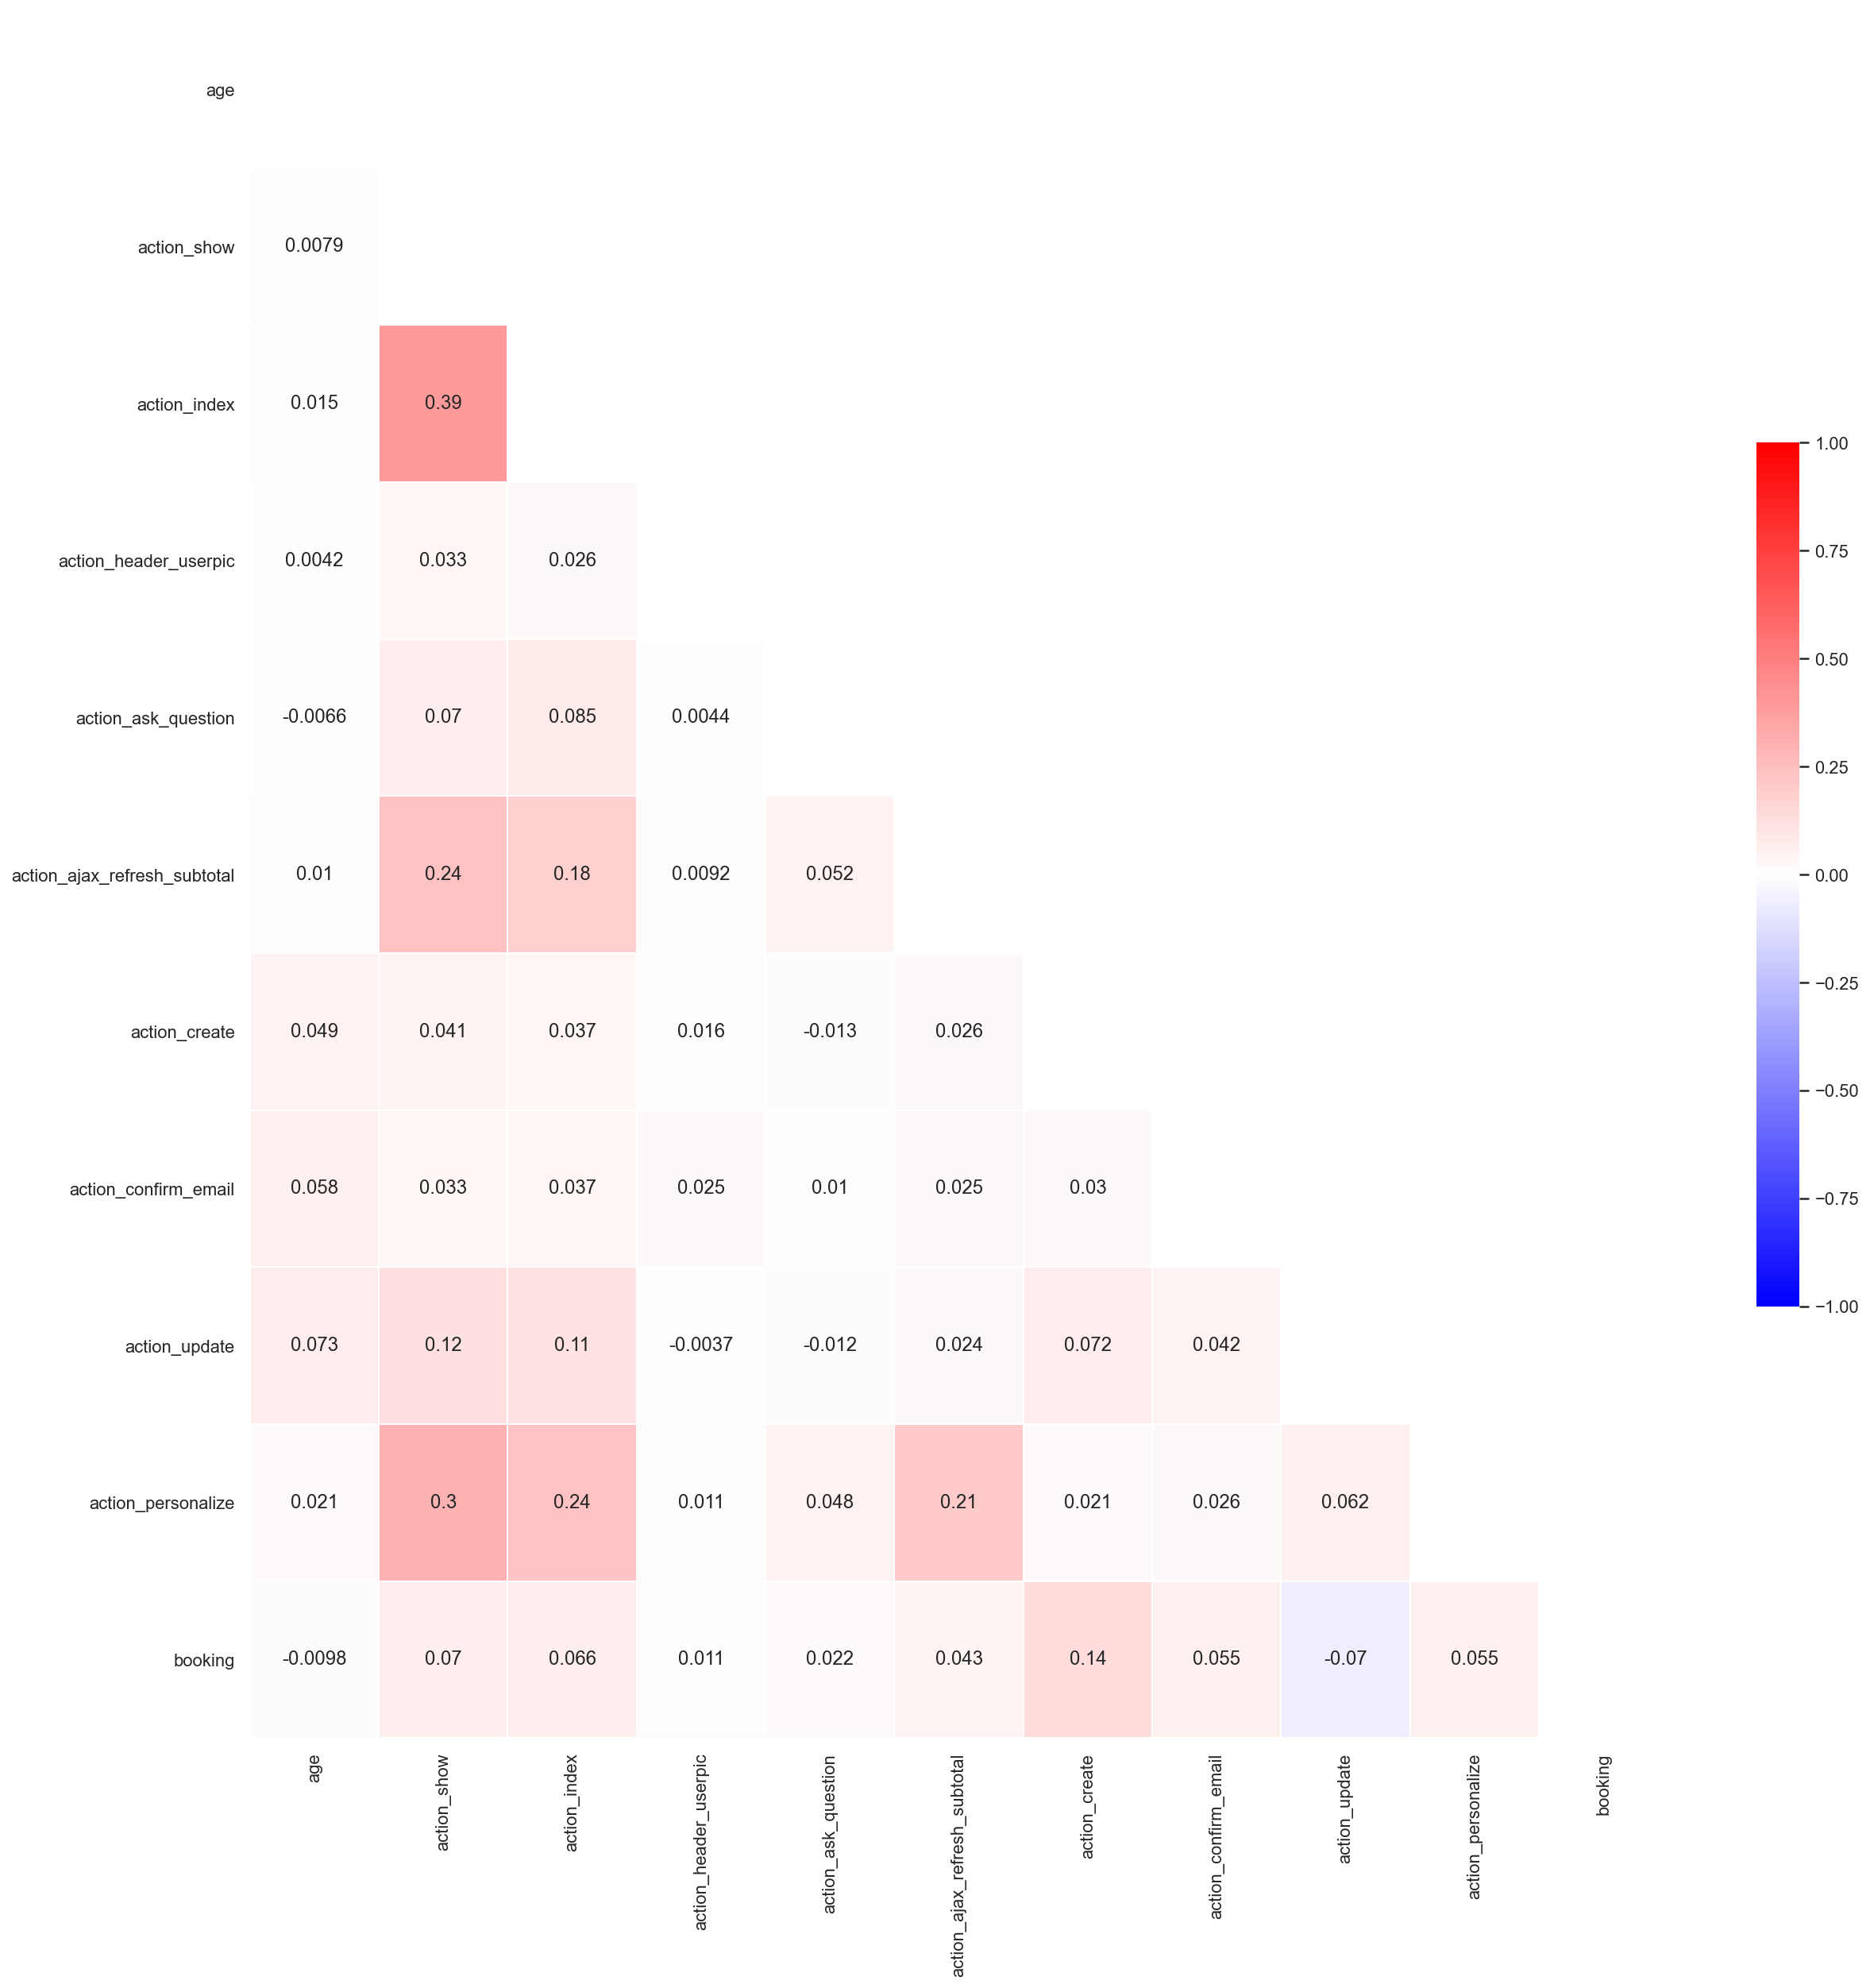

In [407]:
# 빨간색은 양의상관관계 파란색은 음의상관관계
df = tour3[['age', 'action_show', 'action_index', 'action_header_userpic', 'action_ask_question', 'action_ajax_refresh_subtotal', 'action_create', 'action_confirm_email', 'action_update', 'action_personalize', 'booking']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

# feature importance(top 10)로 설명해보기

### 'age', 187

In [384]:
booking_y[['age']].sum()

age    777686.0
dtype: float64

In [385]:
booking_y['age'].value_counts().iplot(kind='bar')

In [386]:
booking_n[['age']].sum()

age    653187.0
dtype: float64

In [387]:
booking_n['age'].value_counts().iplot(kind='bar')

### 'action_show', 95

In [399]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_show']].describe()

,action_show
count,2.215300e+04
mean,3.529185e+05
std,7.300998e+05
min,0.000000e+00
25%,1.285000e+03
50%,7.347500e+04
75%,3.508270e+05
max,1.650345e+07


In [400]:
# 부킹을 안하는 사람들에게 이 행동을 자주 하도록 마케팅 해야한다
booking_n[['action_show']].describe()

,action_show
count,1.848600e+04
mean,2.584016e+05
std,6.009919e+05
min,0.000000e+00
25%,2.550000e+02
50%,4.286050e+04
75%,2.194560e+05
max,1.561210e+07


### 'action_index', 92

In [405]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_index']].describe()

,action_index
count,2.215300e+04
mean,2.344406e+05
std,5.124778e+05
min,0.000000e+00
25%,0.000000e+00
50%,3.103400e+04
75%,2.156900e+05
max,9.724966e+06


In [406]:
booking_n[['action_index']].describe()

,action_index
count,1.848600e+04
mean,1.708682e+05
std,4.368275e+05
min,0.000000e+00
25%,0.000000e+00
50%,1.114400e+04
75%,1.300720e+05
max,1.046293e+07


### 'action_header_userpic', 81

In [408]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_header_userpic']].describe()

,action_header_userpic
count,2.215300e+04
mean,5.183952e+03
std,5.016383e+04
min,0.000000e+00
25%,3.270000e+02
50%,8.990000e+02
75%,2.998000e+03
max,1.997990e+06


In [409]:
booking_n[['action_header_userpic']].describe()

,action_header_userpic
count,1.848600e+04
mean,4.097254e+03
std,4.596714e+04
min,0.000000e+00
25%,0.000000e+00
50%,6.160000e+02
75%,1.750000e+03
max,2.269586e+06


### 'action_ask_question', 74

In [410]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_ask_question']].describe()

,action_ask_question
count,22153.000000
mean,432.221595
std,2166.255196
min,0.000000
25%,0.000000
50%,0.000000
75%,435.000000
max,150979.000000


In [411]:
booking_n[['action_ask_question']].describe()

,action_ask_question
count,18486.000000
mean,288.262577
std,4229.365608
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,497728.000000


### 'action_ajax_refresh_subtotal', 70

In [412]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_ajax_refresh_subtotal']].describe()

,action_ajax_refresh_subtotal
count,2.215300e+04
mean,2.715696e+04
std,1.124153e+05
min,0.000000e+00
25%,0.000000e+00
50%,5.000000e+02
75%,7.062000e+03
max,2.218060e+06


In [413]:
booking_n[['action_ajax_refresh_subtotal']].describe()

,action_ajax_refresh_subtotal
count,1.848600e+04
mean,1.817974e+04
std,9.472669e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.528000e+03
max,4.871979e+06


### 'action_create', 70

In [414]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
# 차이가 다른 컬럼들보다 크다
booking_y[['action_create']].describe()

,action_create
count,2.215300e+04
mean,6.988308e+04
std,1.799187e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.898600e+04
max,2.631266e+06


In [415]:
booking_n[['action_create']].describe()

,action_create
count,1.848600e+04
mean,2.764959e+04
std,1.053992e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.054575e+04
max,2.147747e+06


### 'action_confirm_email', 66

In [416]:
booking_y[['action_confirm_email']].describe()

,action_confirm_email
count,2.215300e+04
mean,1.068703e+05
std,2.619579e+05
min,0.000000e+00
25%,0.000000e+00
50%,1.119200e+04
75%,6.858100e+04
max,2.902601e+06


In [418]:
# 부킹을 안한사람들이 이 행동의 체류시간이 길다
# 포인트!!!⭐️
booking_n[['action_confirm_email']].describe()

,action_confirm_email
count,1.848600e+04
mean,7.895150e+04
std,2.351969e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.206700e+04
max,2.197845e+06


### 'action_update', 65

In [419]:
booking_y[['action_update']].describe()

,action_update
count,2.215300e+04
mean,1.188615e+05
std,4.046581e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.065300e+04
max,1.385364e+07


In [420]:
# 부킹을 안한사람들이 이 행동의 체류시간이 길다
# 포인트!!!⭐️
# 업데이트와 음의 상관관계를 갖는다..
booking_n[['action_update']].describe()

,action_update
count,1.848600e+04
mean,1.938224e+05
std,6.485162e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,6.900525e+04
max,1.727587e+07


### 'action_personalize', 60

In [423]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_personalize']].describe()

,action_personalize
count,2.215300e+04
mean,5.290786e+04
std,1.685178e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.625000e+03
75%,2.713300e+04
max,3.280920e+06


In [422]:
booking_n[['action_personalize']].describe()

,action_personalize
count,1.848600e+04
mean,3.548873e+04
std,1.399834e+05
min,0.000000e+00
25%,0.000000e+00
50%,1.600000e+02
75%,1.181175e+04
max,4.170885e+06
